In [ ]:
#第一块 加载数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)# 已经封装好了的 可以不用管


# 最重要的一节
 - net = nn.Sequential(nn.Flatten().nn.Liner(784,10))
----------------
 *零件① nn.Flatten()*
 发牌机给你的一张图片形状是：[1, 28, 28]
 - **通道**：1
 - **高**：28
 - **宽**：28

Flatten 之后变成：[784]

计算过程为：$1×28×28 = 784$

也就是把一个 28×28 的方阵“展开”成一条直线 

原来（二维矩阵）：
\
\begin{bmatrix}
0.1 & 0.5 \\
0.3 & 0.9
\end{bmatrix}
\
形状：(2, 2)

拍平后（一维向量）：[0.1, 0.5, 0.3, 0.9]
形状：(4,) -->也就是1,4

这里通过将二维矩阵按顺序逐行展开，得到了一维向量。原本二维的结构被“拍平”，数据元素按顺序排列在一维向量中 。 

-------------

## 为什么要拍平？
   - nn.Linear 只能接收一维的输入（一个向量）
   - 你不能把一个 28×28 的方阵直接塞进 Linear
   - 必须先压成 784 的一维向量，Linear 才认识

⚠️ 当一批有 256 张图片时：

<!-- Flatten 前的表格 -->
<table style="font-family: monospace; border-collapse: collapse; margin: 10px 0;">
  <tr>
    <td style="padding: 0 5px; text-align: right;">Flatten 前：</td>
    <td style="padding: 0 5px; text-align: center;">[256,</td>
    <td style="padding: 0 5px; text-align: center;">1,</td>
    <td style="padding: 0 5px; text-align: center;">28,</td>
    <td style="padding: 0 5px; text-align: center;">28]</td>
  </tr>
  <tr>
    <td style="padding: 0 5px;"></td>
    <td style="padding: 0 5px; text-align: center;">↑</td>
    <td style="padding: 0 5px; text-align: center;">↑</td>
    <td style="padding: 0 5px; text-align: center;">↑</td>
    <td style="padding: 0 5px; text-align: center;">↑</td>
  </tr>
  <tr>
    <td style="padding: 0 5px;"></td>
    <td style="padding: 0 5px; text-align: center;">256张</td>
    <td style="padding: 0 5px; text-align: center;">1通道</td>
    <td style="padding: 0 5px; text-align: center;">28高</td>
    <td style="padding: 0 5px; text-align: center;">28宽</td>
  </tr>
</table>

<!-- Flatten 后的表格 -->
<table style="font-family: monospace; border-collapse: collapse; margin: 10px 0;">
  <tr>
    <td style="padding: 0 5px; text-align: right;">Flatten 后：</td>
    <td style="padding: 0 5px; text-align: center;">[256,</td>
    <td style="padding: 0 5px; text-align: center;">784]</td>
  </tr>
  <tr>
    <td style="padding: 0 5px;"></td>
    <td style="padding: 0 5px; text-align: center;">↑</td>
    <td style="padding: 0 5px; text-align: center;">↑</td>
  </tr>
  <tr>
    <td style="padding: 0 5px;"></td>
    <td style="padding: 0 5px; text-align: center;">256张</td>
    <td style="padding: 0 5px; text-align: center;">每张784个数字</td>
  </tr>
</table>

<p style="font-family: monospace; margin-top: 15px;">
注意！Flatten 只拍平后面的维度<br>
      第0维（256张）保留不动！
</p>

-----------------------
 *零件② nn.Linear(784, 10)*
* 784 → 输入特征数（28×28=784个像素）
* 10  → 输出类别数（10种衣服）

*内部自动创建了*
 ### 权重 w：形状 [10, 784]  → 10×784 = 7840 个参数
 ### 偏置 b：形状 [10]       → 10 个参数
　- 总共 7850 个参数需要训练


## 如果换了别的图片
 - 32×32 彩色图片 → 3 × 32 × 32 = 3072  → nn.Linear(3072, ...)
- 64×64 黑白图片 → 1 × 64 × 64 = 4096  → nn.Linear(4096, ...)
- 28×28 黑白图片 → 1 × 28 × 28 = 784   → nn.Linear(784, ...)

- 公式：第一个数 = 通道数 × 高 × 宽
---------
## 如果换了别的任务
- 分类任务中 nn.Linear 输出维度的核心规则
 * 分类任务的最后一层 `nn.Linear` 第二个参数 = 任务的类别数


## 例子
- 猫狗分类（2类）    → nn.Linear(..., 2)
- 数字识别（10类）   → nn.Linear(..., 10)
- ImageNet（1000类） → nn.Linear(..., 1000)

----------------

零件③ nn.Sequential(...)

- nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
*Sequential 把零件串联起来*
- 这里的两层指的是Sequential()里面有两层
- 分别是Flatten 和 Linear层

  **架构图**
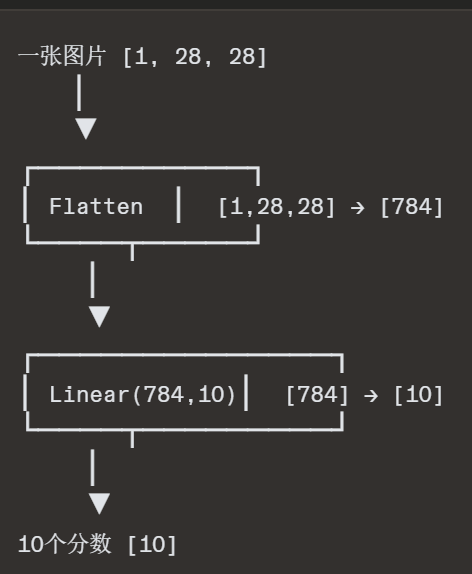


### 如果换了一个数据集
### 彩色图片 32×32，分100类：
```python
net = nn.Sequential(nn.Flatten(), nn.Linear(3*32*32, 100))
#                                            ↑        ↑
#                                     3072个像素   100个类别
```

### 黑白图片 64×64，分5类：
```python
net = nn.Sequential(nn.Flatten(), nn.Linear(1*64*64, 5))
#                                            ↑       ↑
#                                     4096个像素   5个类别
```
-------------